# Papcorns Data Scientist Task - Result file build on "getting_Started" template

This notebook will help you get started with the Papcorns data scientist technical assessment. We'll show you how to:
1. Install requirements and do the imports
2. Connect to the SQLite database
3. Load the data into pandas DataFrames

First, let's import the required libraries:

## Installing Requirements

Let's install the required libraries:

In [1]:
pip install -r requirements.txt


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Imports

Let's do the imports:

In [2]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette('deep')

## Connecting to the Database

Let's establish a connection to the SQLite database:

In [3]:
# Connect to the SQLite database
conn = sqlite3.connect('papcorns.sqlite')

## Exploring the Data Structure

Let's look at the structure of our tables:

In [4]:
# Load users table
users_df = pd.read_sql_query("SELECT * FROM users ;", conn)
print("Users table preview:")
display(users_df)

# Load events table
events_df = pd.read_sql_query("SELECT * FROM user_events;", conn)
print("\nUser events table preview:")
display(events_df)

Users table preview:


,id,created_at,attribution_source,country,name
0,1,2024-05-07T00:00:00,instagram,US,Eve Brown
1,2,2024-10-12T00:00:00,instagram,NL,Frank Moore
2,3,2024-10-15T00:00:00,tiktok,TR,Ivy Anderson
3,4,2024-08-28T00:00:00,tiktok,TR,Alice Brown
4,5,2024-04-03T00:00:00,organic,NL,Bob Moore
...,...,...,...,...,...
997,998,2025-02-01T00:00:00,instagram,TR,Bob Davis
998,999,2024-12-24T00:00:00,organic,NL,Charlie Davis
999,1000,2025-02-13T00:00:00,organic,NL,Jack Anderson
1000,1001,2025-02-16T00:00:00,instagram,US,Bruce Wayne



User events table preview:


,id,created_at,user_id,event_name,amount_usd
0,1,2024-05-07T00:00:00,1,app_install,NaN
1,2,2024-05-12T00:00:00,1,trial_started,NaN
2,3,2024-05-24T00:00:00,1,trial_cancelled,NaN
3,4,2024-10-12T00:00:00,2,app_install,NaN
4,5,2024-10-13T00:00:00,2,trial_started,NaN
...,...,...,...,...,...
3481,3482,2025-02-25T00:00:00,1000,trial_cancelled,NaN
3482,3483,2025-02-25T00:00:00,1001,app_install,NaN
3483,3484,2025-02-25T00:00:00,1001,trial_started,NaN
3484,3485,2025-02-25T00:00:00,1001,subscription_started,9.99


In [5]:
#checking for the dataframes first to see if there is any null value : 

events_df.info()
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3486 entries, 0 to 3485
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          3486 non-null   int64  
 1   created_at  3486 non-null   object 
 2   user_id     3486 non-null   int64  
 3   event_name  3486 non-null   object 
 4   amount_usd  1231 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 136.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  1002 non-null   int64 
 1   created_at          1002 non-null   object
 2   attribution_source  1002 non-null   object
 3   country             1002 non-null   object
 4   name                1002 non-null   object
dtypes: int64(1), object(4)
memory usage: 39.3+ KB


# 📊 Papcorns Data Analysis & Modeling

## 🔖 Table of Contents
1. Total Subscription Revenue by Country
2. Total Trials from Instagram
3. User Acquisition Channel Classification
4. Trial-to-Subscription Conversion Rate
5. Median Subscription Duration by Country
6. Average Lifetime Value (LTV) by Country
7. BONUS: Churn Prediction for User #1002
8. BONUS: Predicted LTV for User #1001

## 🟩 Task 1: Total Subscription Revenue by Country <a id="task1"></a>

In [6]:
#Step 1 : I will see all the event names in event_name field and delete the unnecessery rows on the event table

## We will check which events generate revenue by grouping on event_name

event_names=events_df.groupby('event_name')['amount_usd'].agg('sum')
event_names

#result : only the "subscription_started" and "subscription_renewed" events are the ones that get revenue and about subscription

event_name
app_install                  0.00
subscription_cancelled       0.00
subscription_renewed      5845.50
subscription_started      3801.19
trial_cancelled              0.00
trial_started                0.00
Name: amount_usd, dtype: float64

In [7]:
# we will store the events that are only the "subscription_started" and "subscription_renewed"

subs_df = events_df.query("event_name == 'subscription_started' or event_name == 'subscription_renewed'")

#result : we now reduced from 3486 rows to 1231 rows which we are only interested in

subs_df

,id,created_at,user_id,event_name,amount_usd
5,6,2024-10-20T00:00:00,2,subscription_started,8.99
6,7,2024-11-19T00:00:00,2,subscription_renewed,8.99
7,8,2024-12-19T00:00:00,2,subscription_renewed,8.99
8,9,2025-01-18T00:00:00,2,subscription_renewed,8.99
12,13,2024-10-21T00:00:00,3,subscription_started,4.99
...,...,...,...,...,...
3467,3468,2025-04-07T00:00:00,996,subscription_renewed,4.99
3475,3476,2025-01-03T00:00:00,999,subscription_started,8.99
3476,3477,2025-02-02T00:00:00,999,subscription_renewed,8.99
3477,3478,2025-03-04T00:00:00,999,subscription_renewed,8.99


In [8]:
#Step 2 : Will merge two datasets based on user id

merged_df = pd.merge(subs_df,users_df,left_on="user_id",right_on="id")

In [9]:
#Step 3 : Apply an aggregation function the total revenue generated from subscriptions for each country

result = merged_df.groupby("country")["amount_usd"].sum()

# now lets return it to a normal table format

result=result.reset_index()

#result : we have found the total revenue generated from subscriptions for each country

result

,country,amount_usd
0,NL,3335.29
1,TR,2275.44
2,US,4035.96


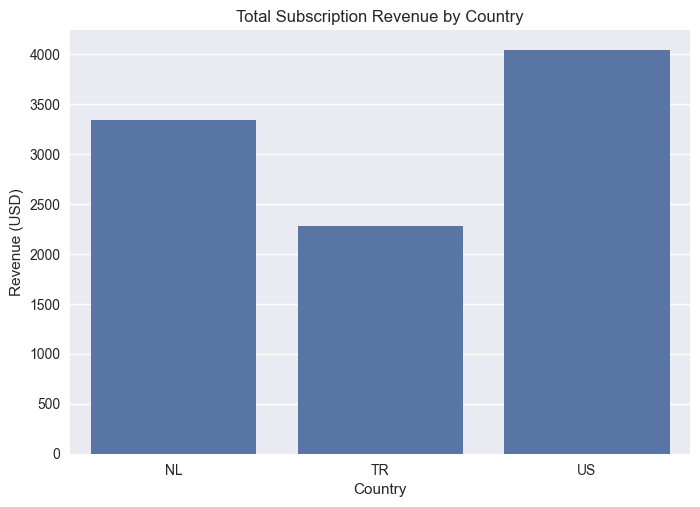

In [10]:
#Creating The Visual Representation

sns.barplot(data=result, x='country', y='amount_usd')
plt.title("Total Subscription Revenue by Country")
plt.xlabel("Country")
plt.ylabel("Revenue (USD)")
plt.show()

#Result of the First Task : 

## 🟩 Task 2: Calculate the total number of trials given to users who came from Instagram <a id="task2"></a>

In [11]:
# Step 1 : filter the users table to only attribition source is instagram and events table to trial started only

#filter the users table where only the attribition_source is instagran

insta_users=users_df.query("attribution_source   == 'instagram'")

#filter the events table where only event_name is "trial_started"

trial_events=events_df.query("event_name == 'trial_started' ")

display(insta_users)

display(trial_events)

,id,created_at,attribution_source,country,name
0,1,2024-05-07T00:00:00,instagram,US,Eve Brown
1,2,2024-10-12T00:00:00,instagram,NL,Frank Moore
6,7,2024-10-21T00:00:00,instagram,US,Henry Moore
11,12,2024-01-08T00:00:00,instagram,US,Frank Miller
14,15,2024-07-10T00:00:00,instagram,US,Bob Miller
...,...,...,...,...,...
991,992,2025-02-07T00:00:00,instagram,US,Grace Jones
992,993,2024-05-29T00:00:00,instagram,TR,Eve Jones
994,995,2024-09-30T00:00:00,instagram,US,Frank Smith
997,998,2025-02-01T00:00:00,instagram,TR,Bob Davis


,id,created_at,user_id,event_name,amount_usd
1,2,2024-05-12T00:00:00,1,trial_started,NaN
4,5,2024-10-13T00:00:00,2,trial_started,NaN
11,12,2024-10-19T00:00:00,3,trial_started,NaN
18,19,2024-08-31T00:00:00,4,trial_started,NaN
22,23,2024-03-09T00:00:00,6,trial_started,NaN
...,...,...,...,...,...
3464,3465,2025-02-01T00:00:00,996,trial_started,NaN
3470,3471,2024-03-08T00:00:00,997,trial_started,NaN
3474,3475,2024-12-29T00:00:00,999,trial_started,NaN
3480,3481,2025-02-15T00:00:00,1000,trial_started,NaN


In [12]:
# Step 2 : Merge two datasets based on user id

merged_df=pd.merge(insta_users,trial_events,left_on="id",right_on="user_id")

display(merged_df)

,id_x,created_at_x,attribution_source,country,name,id_y,created_at_y,user_id,event_name,amount_usd
0,1,2024-05-07T00:00:00,instagram,US,Eve Brown,2,2024-05-12T00:00:00,1,trial_started,NaN
1,2,2024-10-12T00:00:00,instagram,NL,Frank Moore,5,2024-10-13T00:00:00,2,trial_started,NaN
2,12,2024-01-08T00:00:00,instagram,US,Frank Miller,45,2024-01-14T00:00:00,12,trial_started,NaN
3,15,2024-07-10T00:00:00,instagram,US,Bob Miller,64,2024-07-12T00:00:00,15,trial_started,NaN
4,16,2024-04-26T00:00:00,instagram,NL,Alice Brown,67,2024-04-28T00:00:00,16,trial_started,NaN
...,...,...,...,...,...,...,...,...,...,...
205,989,2025-01-12T00:00:00,instagram,NL,Alice Jones,3433,2025-01-17T00:00:00,989,trial_started,NaN
206,990,2024-11-24T00:00:00,instagram,TR,David Davis,3439,2024-11-26T00:00:00,990,trial_started,NaN
207,992,2025-02-07T00:00:00,instagram,US,Grace Jones,3449,2025-02-09T00:00:00,992,trial_started,NaN
208,995,2024-09-30T00:00:00,instagram,US,Frank Smith,3459,2024-10-04T00:00:00,995,trial_started,NaN


In [13]:
# Step 3: Get the result by finding the row count of table

result= len(merged_df)

# here is the result : 

result

210

## 🟩 Task 3: Create a new column named 'acquisition_channel' by categorizing users based on their 'attribution_source':
'Paid': users from instagram or tiktok                  
'Organic': users from organic sources

In [14]:
# Checked if all the  attribution_source are instagram,tiktok and organic

users_df['attribution_source'].value_counts() # yes it is

attribution_source
tiktok       352
organic      344
instagram    306
Name: count, dtype: int64

In [15]:
# creating the new column based on the logic applied on attribution_source

users_df['acquisition_channel'] = np.where(
    users_df['attribution_source'] == 'organic',
    'Organic',
    'Paid'
)

In [16]:
# lets see the new users_df dataset

users_df

#result : 

,id,created_at,attribution_source,country,name,acquisition_channel
0,1,2024-05-07T00:00:00,instagram,US,Eve Brown,Paid
1,2,2024-10-12T00:00:00,instagram,NL,Frank Moore,Paid
2,3,2024-10-15T00:00:00,tiktok,TR,Ivy Anderson,Paid
3,4,2024-08-28T00:00:00,tiktok,TR,Alice Brown,Paid
4,5,2024-04-03T00:00:00,organic,NL,Bob Moore,Organic
...,...,...,...,...,...,...
997,998,2025-02-01T00:00:00,instagram,TR,Bob Davis,Paid
998,999,2024-12-24T00:00:00,organic,NL,Charlie Davis,Organic
999,1000,2025-02-13T00:00:00,organic,NL,Jack Anderson,Organic
1000,1001,2025-02-16T00:00:00,instagram,US,Bruce Wayne,Paid


## 🟩 Task 4: Analyze the trial-to-subscription conversion rate:

Calculate the overall conversion rate


Break down the conversion rate by attribution_source

In [17]:
# understanding the data 


# 1) finding out if there are people who resubscribed after cancelling subscription

# getting all the apperances of user_id ' s which have "subscription_started" event in events_df to see if there any resubsccription after cancelling
dupes = events_df[events_df['event_name'] == 'subscription_started']['user_id'].value_counts()
dupes = dupes[dupes > 1]

print(f"Users with multiple subscription_started events: {len(dupes)}")

# 2) finding out if there are people who subscribed without trial 

#getting the id's of subscribed users

sub_users = events_df[events_df['event_name'] == 'subscription_started']['user_id']

#getting the id's of users who tried trial

trial_users = events_df[events_df['event_name'] == 'trial_started']['user_id']

#Checking if there is any user who subscribed without the trial by set substraction

no_trial_subs = set(sub_users) - set(trial_users)
print(f"Number of users who subscribed without a trial: {len(no_trial_subs)}")

#result : there is no subscribe without trial

Users with multiple subscription_started events: 0
Number of users who subscribed without a trial: 0


In [18]:
# a) finding the overall conversion rate

# divide sub_users by trial_users

conversion_rate = len(sub_users) / len(trial_users)

# convert to a better format 

result = round(conversion_rate,2)

# result : 

result


0.71

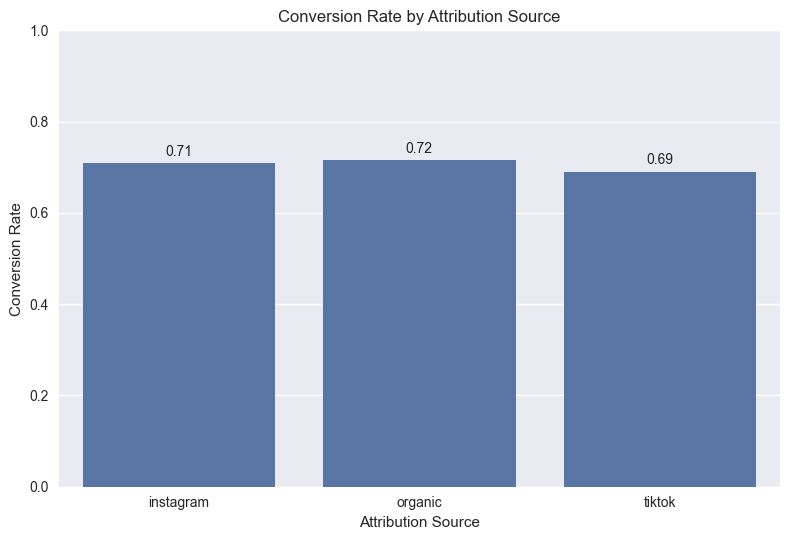

In [19]:
# b) Breaking down the conversion rate by attribution_source 

# filtering the sub_start or trial_start events only

sub_trial_events=events_df.query("event_name in ['subscription_started', 'trial_started']")

#join the data frames

merged_df=pd.merge(sub_trial_events,users_df,left_on="user_id",right_on="id")

# group them based on attribution_source  and find the overall conversion rates

grouped = merged_df.groupby(['attribution_source', 'event_name'])['user_id'].nunique().unstack(fill_value=0)

#adding conversion column
grouped['conversion_rate'] = grouped['subscription_started'] / grouped['trial_started']

#visualizing the result 

grouped = grouped.reset_index()

# Creating the barplot and store the axes
ax = sns.barplot(data=grouped, x='attribution_source', y='conversion_rate')

# Adding value labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

# Customizing the chart
plt.title("Conversion Rate by Attribution Source")
plt.ylim(0, 1)
plt.ylabel("Conversion Rate")
plt.xlabel("Attribution Source")
plt.tight_layout()
plt.show()

#result :

## 🟩 Task 5: Calculate the median subscription duration (in months) for each country

In [20]:
# Step 1: filtering the sub_start or sub_cancel events in to separate data frames  and removing unnecessery columns

sub_start_events= events_df.query("event_name == 'subscription_started' ")[['user_id',"event_name", 'created_at']] #481 rows

sub_cancel_events = events_df.query("event_name == 'subscription_cancelled' ")[['user_id',"event_name", 'created_at']] #370 rows

In [21]:
# Step 2: left joining the sub_start_events table to sub_cancel_events table because a user may not cancel but have to start

merged_df = pd.merge(sub_start_events,sub_cancel_events,left_on="user_id",right_on="user_id",how="left") #481 rows

In [22]:
# Step 3 : create a column by substracting cancel time from start time or now from start time if there is no cancel

#fill null values of created_at_y with date_time now

current_time = pd.Timestamp.now()

merged_df['created_at_y'] = merged_df['created_at_y'].fillna(current_time)

#reducing all datetimes to date 

merged_df['created_at_x'] = pd.to_datetime(merged_df['created_at_x']).dt.date
merged_df['created_at_y'] = pd.to_datetime(merged_df['created_at_y']).dt.date

# Finding the subscription duration in days

merged_df['sub_duration'] = (merged_df['created_at_y'] - merged_df['created_at_x'])

# Ensure sub_duration is treated as Timedelta (though it should be by default)
merged_df['sub_duration'] = pd.to_timedelta(merged_df['sub_duration'])

#finding the subscription duration in months

merged_df['sub_duration_month'] = round(merged_df['sub_duration'].dt.days / 30.44,2)

In [23]:
# Step 4 : join users tables and merged_df 

subtimes_and_users_df = pd.merge(merged_df,users_df,left_on="user_id",right_on="id")

In [24]:
# Step 5 : grup them by country and find the median in months

median_duration_by_country = subtimes_and_users_df.groupby('country')['sub_duration_month'].median()

display(median_duration_by_country)

country
NL    2.73
TR    2.83
US    2.53
Name: sub_duration_month, dtype: float64

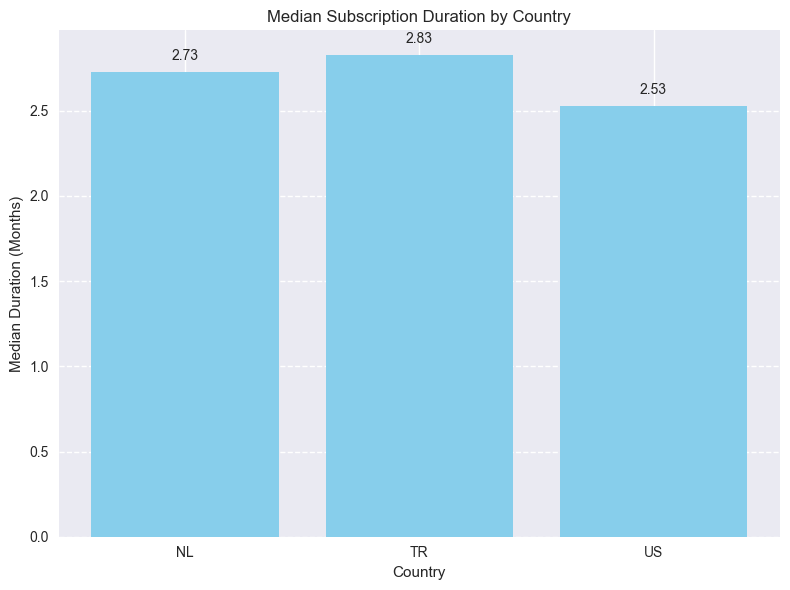

In [25]:
# Step 6 : visualize the result
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
bars = plt.bar(median_duration_by_country.index, median_duration_by_country.values, color='skyblue')
plt.title('Median Subscription Duration by Country')
plt.xlabel('Country')
plt.ylabel('Median Duration (Months)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')

# Add value labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# result : 

## 🟩 Task 6: Calculate the Average Lifetime Value (LTV) by country

In [26]:
# Checking the assumption

events_revenue=events_df.groupby("event_name")["amount_usd"].sum()
events_revenue

#result: my assumption is true

event_name
app_install                  0.00
subscription_cancelled       0.00
subscription_renewed      5845.50
subscription_started      3801.19
trial_cancelled              0.00
trial_started                0.00
Name: amount_usd, dtype: float64

In [27]:
# Step 1 : Filter events dataframe to get the revenue events only, which are "subscription_started" and "subscription_renewed"

revenue_events = events_df.query("event_name in ['subscription_started', 'subscription_renewed']")

In [28]:
# Step 2 : Find the total revenue for each user by grouping by user_id on events data frame as user_revenue_df

user_revenue_df = revenue_events.groupby("user_id")["amount_usd"].sum()

#reset index

user_revenue_df=user_revenue_df.reset_index(name="total_revenue")

In [29]:
# Step 3 : join the user_revenue_df with users_df

user_country_df = pd.merge(user_revenue_df, users_df,left_on="user_id",right_on="id")

In [30]:
# Step 4 : group them by country and get the Average Revenue Per User a.k.a. ARPU by country

arpu_by_country = user_country_df.groupby("country")["total_revenue"].mean()

In [31]:
# Step 5 : get the median_duration_by_country from the subtimes_and_users_df from task 5

mean_duration_by_country = subtimes_and_users_df.groupby('country')['sub_duration_month'].mean()


In [32]:
# Step 6 : merge to data frames based on country

#transforming them to dataframe :

arpu_df = arpu_by_country.reset_index()
mean_duration_df = mean_duration_by_country.reset_index()

# Merging data frames

ltv_df = pd.merge(arpu_df, mean_duration_df, on="country")


In [33]:
# Step 7 : Create the LTV column by dividing total_revenue to sub_duration_month

ltv_df["ltv"] = ltv_df["total_revenue"] * ltv_df["sub_duration_month"]

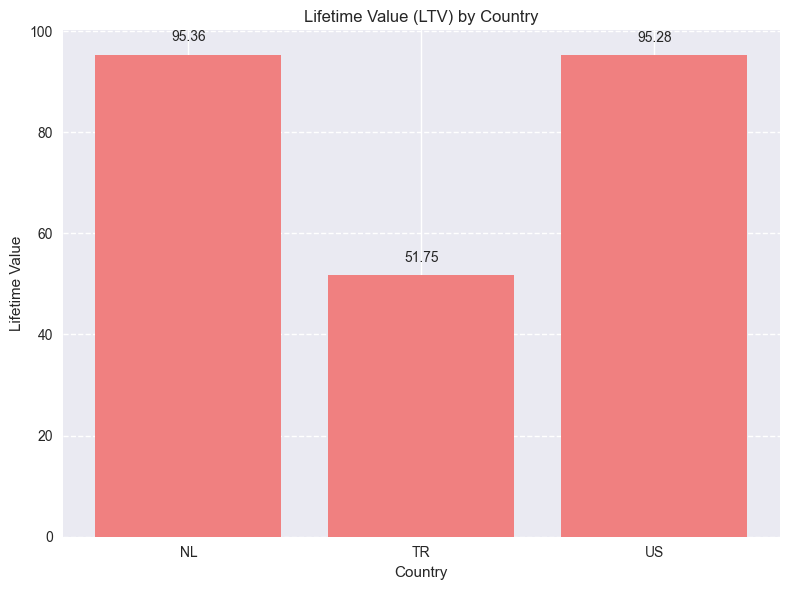

In [34]:
# Step 8 : visualizing the result

plt.figure(figsize=(8, 6))
plt.bar(ltv_df['country'], ltv_df['ltv'], color='lightcoral')
plt.title('Lifetime Value (LTV) by Country')
plt.xlabel('Country')
plt.ylabel('Lifetime Value')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')

# Add LTV values on top of the bars
for i, v in enumerate(ltv_df['ltv']):
    plt.text(ltv_df['country'][i], v + 2, f'{v:.2f}', ha='center', va='bottom') # Adjust vertical offset (2) as needed

plt.tight_layout()
plt.show()

# result:

My Finding: The Lifetime Value (LTV) is significantly higher in NL and US compared to TR.

Final Note For Bonus Tasks: While I have begun studying machine learning (using Jake VanderPlas's book "Python Data Science Handbook"), I was not able to complete the bonus tasks within the timeframe for this assessment. I am dedicated to expanding my knowledge in this area and will be proficient in machine learning with more time.